# ML for Econ Analysis Project 1 - Peru
name here
## 1 Problem Description
blablablabla


In [1]:
# install packages
# !pip install scikit-neuralnetwork
# !pip install lightgbm
# ! pip install mlxtend

In [62]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#Import everything
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import normal as rnorm
import itertools
import time
import statsmodels.api as sm
import random

# for plot
import seaborn as sns
#stata-like output
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for missing values
import missingno as msno
from sklearn.impute import SimpleImputer

In [63]:
 #regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [64]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 2 Data Preprocessing
to check the missing value of data, visulize the data to get a "feel", and normalize the data

## 2.1 Dataset acquisition
we use pd.read_csv to read the csv file as dataframe data type.

In [65]:
# Peru data
peru = pd.read_csv('datasets/Project1_CompletaData_96.csv')
peru.head()
# Overview of all variables
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Columns: 105 entries, lnpercapitaconsumption to percapitahat_OLS
dtypes: float64(41), int64(64)
memory usage: 37.1 MB


## 2.2 Cleaning the Data
We check our dataset by detecting whether it contains null, Nan values or missing values.

In [66]:
peru.isnull().sum()

lnpercapitaconsumption      0
d_fuel_other                0
d_fuel_wood                 0
d_fuel_coal                 0
d_fuel_kerosene             0
                         ... 
h_hhsize                    0
id_for_matlab               0
hhid                        0
lncaphat_OLS              927
percapitahat_OLS          927
Length: 105, dtype: int64

In [67]:
columnNames = peru.columns.values.tolist()
columnNames[2]

'd_fuel_wood'

In [68]:
peru.loc[25:26,columnNames[22:30]]

,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

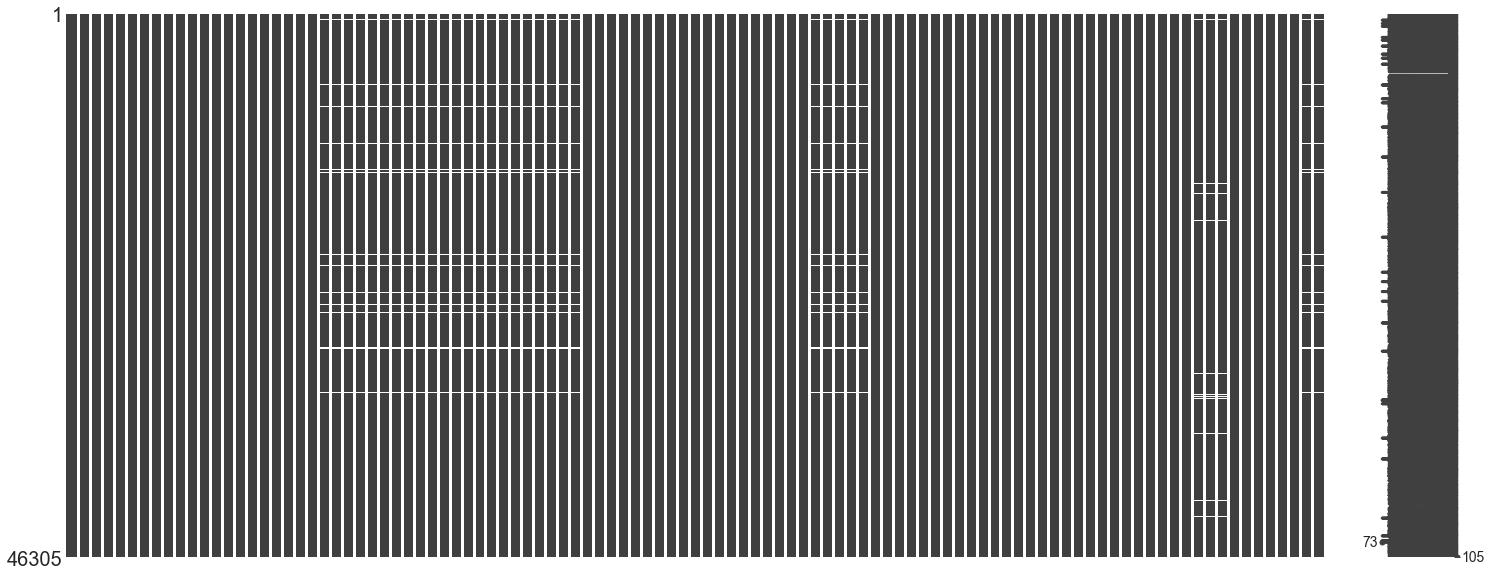

In [6]:
# Visualize no missing values
msno.matrix(peru)

In [69]:
# Visualize the distribution of each feature to get an overview of the dataset.
peru.describe(include='all')

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,refrigerator,washer,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,...,45306.000000,45306.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.856564,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,...,0.360504,0.132565,0.500011,461.243627,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.744232,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,...,0.480152,0.339108,0.500005,411.392663,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660060
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.250000,0.000000,1.000000,1.000000,1.010110e+05,4.434425,-57.498259
25%,5.344724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,209.500000,0.000000,2.000000,11577.000000,9.080021e+07,5.332906,235.941390
50%,5.876649,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,356.612100,0.000000,4.000000,23153.000000,1.828055e+08,5.871003,404.708715
75%,6.360625,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,578.607700,1.000000,5.000000,34729.000000,2.814050e+08,6.306364,611.242935
max,9.663810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15737.630000,1.000000,20.000000,46305.000000,4.035098e+08,7.738163,2132.653600


## 2.3 Split Train-test dataset

In [70]:
trainNaN = peru[peru['training']==1]
# train = trainNaN.dropna()
train=trainNaN.dropna(axis=0, how='any', inplace=False)
# train.isnull().sum().sum()

# train.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

#train.to_csv(r'E:\ML for EconAna\Peru\train_py.csv',index=True ,header=True)


In [71]:
test = peru[peru['training']==0]
test.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,refrigerator,washer,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0,211.0000,0,1,1,233710511,5.246471,284.42427
1,5.768755,0,0,0,0,1,0,0,0,0,...,1.0,0.0,0,320.1389,0,3,2,295508011,6.129468,522.88406
2,5.968277,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0,390.8318,0,4,3,257600211,6.665577,878.49612
3,5.654599,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0,285.6018,1,9,4,198104311,6.088294,567.47054
4,4.771289,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0,118.0713,1,8,5,24805311,5.008170,115.49293


In [72]:
x_train = train.iloc[:,1: 97]
x_test = test.iloc[:,1: 97]
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_dominio_3,d_dominio_4,d_dominio_5,d_dominio_6,d_dominio_7,internet,cable,computer,refrigerator,washer
23152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1.0,1.0,1.0
23154,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
23155,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23156,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0


In [73]:
y_train = train.loc[:,'percapitaconsumption']
lny_train = train.loc[:,'lnpercapitaconsumption']
y_test = test.loc[:,'percapitaconsumption']
lny_test = test.loc[:,'lnpercapitaconsumption']

##impute the missing values and export it to the current directory
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(x_test)
x_test = pd.DataFrame(imr.transform(x_test))
x_test.to_csv(r'Datasets\x_test_96.csv',index=True ,header=True)

In [74]:
# import x_test data
x_test = pd.read_csv('datasets/x_test_96.csv')
x_test.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_dominio_3,d_dominio_4,d_dominio_5,d_dominio_6,d_dominio_7,internet,cable,computer,refrigerator,washer
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
print(np.any(np.isnan(x_test)))
print(np.all(np.isfinite(x_test)))
print(np.any(np.isinf(x_test)))

False
True
False


In [76]:
x_test.isnull().sum()

d_fuel_other       0
d_fuel_wood        0
d_fuel_coal        0
d_fuel_kerosene    0
d_fuel_gas         0
                  ..
internet           0
cable              0
computer           0
refrigerator       0
washer             0
Length: 96, dtype: int64

In [82]:
x_test.shape

(23152, 96)

In [83]:
x_train.shape

(22191, 96)

## 2.5  Create new variables

#交互 x_train and x_test里所有的column,两两相乘
 for i in range(0,77):
    a=i
    for j in range(a+1,77):
            x_train['interaction'+str(i)+str('t')+str(j)]=x_train.iloc[:,i]* x_train.iloc[:,j]


#x_test 交互
for i in range(0,77):
    a=i
    for j in range(a+1,77):
            x_test['interaction'+str(i)+str('t')+str(j)]=x_test.iloc[:,i]* x_test.iloc[:,j]

In [17]:
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_dominio_3,d_dominio_4,d_dominio_5,d_dominio_6,d_dominio_7,internet,cable,computer,refrigerator,washer
23152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1.0,1.0,1.0
23154,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
23155,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23156,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0


 ## 2.5 Feature Selection
 Use forward selection. 

In [39]:
random.seed(30)

In [40]:
sfs = SFS(LinearRegression(),
         k_features= (30, 96),
         forward=True,
         floating=False,
         scoring='neg_mean_squared_error',
         cv=10)
sfs.fit(x_train, y_train)
sfs.k_feature_names_

('d_fuel_other',
 'd_fuel_wood',
 'd_fuel_coal',
 'd_fuel_gas',
 'd_fuel_electric',
 'd_fuel_none',
 'd_water_river',
 'd_water_truck',
 'd_water_outside',
 'd_drain_none',
 'd_drain_river',
 'd_drain_inside',
 'd_wall_other',
 'd_wall_tapia',
 'd_wall_adobe',
 'd_roof_straw',
 'd_roof_mat',
 'd_roof_tile',
 'd_floor_earth',
 'd_floor_tile',
 'd_floor_sheets',
 'd_floor_parquet',
 'd_telephone',
 'd_h_educ_none',
 'd_h_educ_sec',
 'd_h_educ_higher_nouni',
 'd_h_educ_higher_uni',
 'd_h_educ_post',
 'd_max_educ_none',
 'd_max_educ_prim',
 'd_max_educ_higher_nouni',
 'd_insurance_1',
 'd_insurance_2',
 'd_insurance_3',
 'd_insurance_4plus',
 'd_crowd_lessthan1',
 'd_crowd_1to2',
 'd_crowd_2to4',
 'd_lux_0',
 'd_lux_1',
 'd_lux_2',
 'd_lux_3',
 'd_lux_4',
 'd_lux_5',
 'd_month_8',
 'd_month_10',
 'd_month_11',
 'd_year_2010',
 'd_dominio_1',
 'd_dominio_2',
 'd_dominio_3',
 'd_dominio_4',
 'd_dominio_5',
 'd_dominio_6',
 'd_dominio_7',
 'cable',
 'washer')

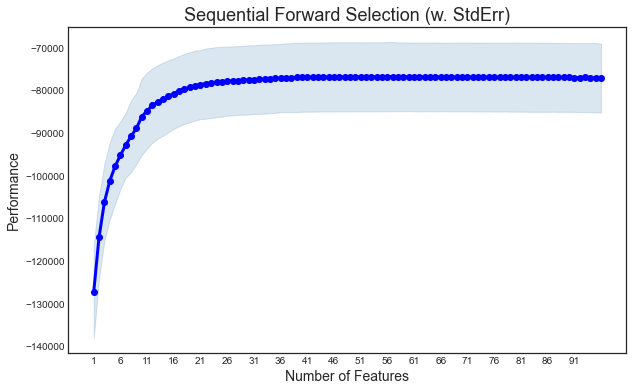

In [41]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
ticks = np.arange(1, 96, 5)
plt.xticks(ticks)
plt.show()

In [42]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [43]:
x_train = pd.DataFrame(x_train_sfs)
x_test = pd.DataFrame(x_test_sfs)

In [44]:
print(x_train.shape)
print(x_test.shape)

(22191, 57)
(23152, 57)


# 3 Model implementation
## 3.1 Replicate the original paper(Peru): OLS

In [79]:
# add constant for train_x
one = np.ones(np.shape(x_train))
x_train_withcons = np.concatenate([one,x_train],axis=1)

In [80]:
# add constant for test_x
one = np.ones(np.shape(x_test))
x_test_withcons = np.concatenate([one,x_test],axis=1)

In [81]:
# linear regression with constant
linreg = LinearRegression()
model1 = linreg.fit(x_train_withcons,y_train)

In [124]:
model1.coef_

array([ 1.37487315e+10,  7.82425574e+14, -2.49888903e+14, -1.77289173e+14,
       -4.52847971e+14, -3.99575890e+14,  4.05815965e+13,  7.01067696e+13,
        4.81399938e+12, -4.39472369e+13, -4.23351336e+13, -3.03311541e+12,
       -8.35071510e+12, -2.08976882e+13, -7.12646841e+13,  2.18870600e+13,
       -1.75103907e+12,  4.54829372e+13,  2.09164554e+12,  4.08606210e+13,
       -1.29178301e+13,  1.46565238e+13, -1.21110620e+13,  1.10429965e+13,
       -1.63770291e+13, -1.31694314e+13,  1.48435709e+13,  1.37617113e+13,
       -3.18142618e+12,  1.44923248e+13,  2.26292189e+13, -9.57139299e+12,
        1.26666398e+13,  1.39262871e+12, -1.56652861e+13,  4.37355568e+12,
        8.92425843e+12, -1.19550562e+13, -1.92572891e+13,  3.94928842e+12,
        5.57733798e+12,  5.76222187e+12, -3.29466819e+13,  4.19981368e+12,
        7.54574333e+12,  5.60065070e+12, -8.28077942e+12,  9.24598381e+12,
       -2.70549294e+13,  2.00993437e+12,  4.03233699e+12,  1.13565701e+13,
        2.68108797e+12,  

In [125]:
ols_estimate_y = model1.predict(x_train_withcons)
ols_estimate_y

array([400.625, 798.75 , 220.75 , ..., 404.25 , 336.   , 725.   ])

In [126]:
ols_pred_y = model1.predict(x_test_withcons)

In [127]:
# Linear regression by using Stata Model
x = sm.add_constant(x_train)
model2=sm.OLS(y_train,x)
results=model2.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,271.5376,14.141,19.203,0.000,243.821,299.254
d_fuel_other,-100.4283,8.378,-11.987,0.000,-116.851,-84.006
d_fuel_wood,-89.2030,7.219,-12.357,0.000,-103.353,-75.053
d_fuel_coal,-40.1382,11.701,-3.430,0.001,-63.073,-17.203
d_fuel_kerosene,-57.9007,25.350,-2.284,0.022,-107.588,-8.213
d_fuel_gas,-15.6770,6.562,-2.389,0.017,-28.540,-2.814
d_fuel_electric,436.4550,20.089,21.726,0.000,397.079,475.831
d_fuel_none,138.4298,11.108,12.462,0.000,116.658,160.202
d_water_other,34.2105,9.082,3.767,0.000,16.408,52.013
d_water_river,15.3014,6.012,2.545,0.011,3.518,27.085


## Calculate MSE-OLS

In [128]:
#calculate MSE for the training dataset (from the estimation of original paper)
from sklearn import metrics

metrics.mean_squared_error(train.lncaphat_OLS,train.lnpercapitaconsumption)

0.1919835924821717

In [129]:
#calculate MSE for the training dataset (Original Paper)
metrics.mean_squared_error(train.percapitahat_OLS,train.percapitaconsumption)

77167.47406692483

In [130]:
#calculate MSE for the testing dataset (Original Paper)
original_pred_y = pd.DataFrame(test.percapitahat_OLS)
NaN = original_pred_y.join(y_test)
NaN=NaN.dropna(axis=0, how='any', inplace=False)
NaN.head()
print(NaN.shape)
metrics.mean_squared_error(NaN.percapitahat_OLS,NaN.percapitaconsumption)

(22704, 2)


89689.4794288619

In [131]:
#calculate MSE for the training dataset (my calculation)
metrics.mean_squared_error(ols_estimate_y,y_train)

76083.72463153559

In [132]:
#calclulate MSE for the testing dataset (my calculation)
metrics.mean_squared_error(ols_pred_y, y_test)

4.202083297005615e+27

## Model - Ridge

In [108]:
ridge = RidgeCV(alphas=[0.1,0.3,0.5,0.7,0.9,1])
ridge.fit(x_train,y_train)
ridge_estimate_y = ridge.predict(x_train)

In [113]:
ridge.alpha_

1.0

In [114]:
metrics.mean_squared_error(ridge_estimate_y,y_train)

76081.6881101366

In [115]:
ridge_pred_y = ridge.predict(x_test)

In [116]:
metrics.mean_squared_error(ridge_pred_y,y_test)

88413.4045993285

## Model - Lasso

In [45]:
lassocv = LassoCV(alphas = [0.1,0.13,0.15,0.185,0.19,0.193,0.2,0.21,0.3,0.5,0.7,0.9,1],cv=10)
lassocv.fit(x_train, y_train)

LassoCV(alphas=[0.1, 0.13, 0.15, 0.185, 0.19, 0.193, 0.2, 0.21, 0.3, 0.5, 0.7,
                0.9, 1],
        cv=10)

In [46]:
lassocv.alpha_

0.1

In [47]:
lasso_estimate_y = lassocv.predict(x_train)

In [48]:
metrics.mean_squared_error(lasso_estimate_y,y_train)

76176.04660288522

In [49]:
lasso_pred_y = lassocv.predict(x_test)

In [50]:
metrics.mean_squared_error(lasso_pred_y,y_test)

88139.84009690874

In [104]:
ln_lassocv = LassoCV(alphas = [0.0001,0.0005,0.001,0.005,0.01,0.1,0.3,0.5,1],cv=10)
ln_lassocv.fit(x_train, lny_train)

LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.1, 0.2, 0.21, 0.3,
                0.5, 0.7, 0.9, 1],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [105]:
ln_lassocv.alpha_

0.0001

In [106]:
lasso_pred_lny = ln_lassocv.predict(x_test)

In [107]:
metrics.mean_squared_error(lasso_pred_lny,lny_test)

0.1866626557954445

## 导出预测文件

In [ ]:
# combine the original test dataset and the precise predicted y
pred_y = pd.DataFrame(lasso_pred_y)
total_out = pred_y.join(test)
total_out.to_csv(r'Datasets\total_out.csv',index=True ,header=True)

## 3.2 Model-KNN Regression
Not sure if it is a suitable algorithm for our dataset since all the features are dummies, and it is hard to define/calculate the "distance".
But we will see...

In [84]:
knn = KNeighborsRegressor(n_neighbors=33)

In [85]:
random.seed(30)

In [86]:
sfs = SFS(LinearRegression(),
         k_features= (30, 96),
         forward=True,
         floating=False,
         scoring='neg_mean_squared_error',
         cv=10)
sfs.fit(x_train, y_train)
sfs.k_feature_names_

('d_fuel_other',
 'd_fuel_wood',
 'd_fuel_coal',
 'd_fuel_gas',
 'd_fuel_electric',
 'd_fuel_none',
 'd_water_river',
 'd_water_truck',
 'd_water_outside',
 'd_drain_none',
 'd_drain_river',
 'd_drain_inside',
 'd_wall_other',
 'd_wall_tapia',
 'd_wall_adobe',
 'd_roof_straw',
 'd_roof_mat',
 'd_roof_tile',
 'd_floor_earth',
 'd_floor_tile',
 'd_floor_sheets',
 'd_floor_parquet',
 'd_telephone',
 'd_h_educ_none',
 'd_h_educ_sec',
 'd_h_educ_higher_nouni',
 'd_h_educ_higher_uni',
 'd_h_educ_post',
 'd_max_educ_none',
 'd_max_educ_prim',
 'd_max_educ_higher_nouni',
 'd_insurance_1',
 'd_insurance_2',
 'd_insurance_3',
 'd_insurance_4plus',
 'd_crowd_lessthan1',
 'd_crowd_1to2',
 'd_crowd_2to4',
 'd_lux_0',
 'd_lux_1',
 'd_lux_2',
 'd_lux_3',
 'd_lux_4',
 'd_lux_5',
 'd_month_8',
 'd_month_10',
 'd_month_11',
 'd_year_2010',
 'd_dominio_1',
 'd_dominio_2',
 'd_dominio_3',
 'd_dominio_4',
 'd_dominio_5',
 'd_dominio_6',
 'd_dominio_7',
 'cable',
 'washer')

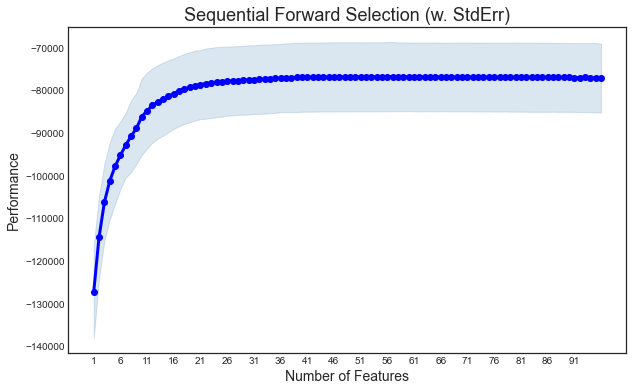

In [87]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
ticks = np.arange(1, 96, 5)
plt.xticks(ticks)
plt.show()

In [88]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [93]:
x_train = pd.DataFrame(x_train_sfs)
x_test = pd.DataFrame(x_test_sfs)

In [ ]:
# 调参时再用这块代码 跑很久
# create a knn regression model
knr = KNeighborsRegressor(weights = 'distance')
# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(31, 33)}
# use gridsearch to test all values for n_neighbors
knr_gscv = GridSearchCV(knr, param_grid,scoring='neg_mean_squared_error', cv=5)
# fit model to data
knr_gscv.fit(x_train, y_train)
#check top performing n_neighbors value: 33
knr_gscv.best_params_
# Prediction for x_train
knr_estimate_y= knr_gscv.predict(x_train)
# Calculate MSE from the prediction for x_train and original paper
metrics.mean_squared_error(knr_estimate_y, train.percapitaconsumption)

In [94]:
x_train.shape

(22191, 57)

hamming distance
n_neighbors = 33, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 92865.84069921833
n_neighbors = 43, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 92782.34994191969
n_neighbors = 83, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 93658.14366348418
n_neighbors = 53, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 92887.6791899418
n_neighbors = 73, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 93363.95014209233
n_neighbors = 13, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 94638.38714857536
n_neighbors = 25, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse = 92932.93751991974
n_neighbors = 37, weights = 'distance', metric = 'hamming', train mse = 4835.575530355144; test mse =92757.73492501541

In [117]:
knr = KNeighborsRegressor(n_neighbors = 37, weights = 'distance', metric = 'hamming')
knr.fit(x_train, y_train)
train_knr_pred = knr.predict(x_train)

In [118]:
metrics.mean_squared_error(train_knr_pred, y_train)

4835.575530355144

In [119]:
knr_pred_y = knr.predict(x_test)

In [120]:
metrics.mean_squared_error(knr_pred_y, y_test)

92757.73492501541

## 3.3 SVM Regression (SVR)

params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','poly','rbf','sigmoid']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
svr_gscv.fit(x_train,y1_train)

In [ ]:
params_dict={'C':[0.001,0.1,1,100],'gamma':[0.001,0.1,1,100],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_

In [ ]:
params_dict={'C':[100],'gamma':[0.1],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_

In [ ]:
svr_estimate_y = svr_gscv.predict(x_train)

In [ ]:
metrics.mean_squared_error(svr_estimate_y,y_train)

In [ ]:
# predict for x_test
svr_pred_y = svr_gscv.predict(x_test)

In [ ]:
# calculate MSE from the prediction for x_test and y_test
metrics.mean_squared_error(svr_pred_y, y_test)

In [ ]:
# tune the svr model
params_dict={'C':[300,400, 500],'gamma':[0.11, 0.12, 0.13],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_


In [ ]:
params_dict={'C':[400],'gamma':[0.11],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_

In [ ]:
svr_pred_y = svr_gscv.predict(x_test)
metrics.mean_squared_error(svr_pred_y, y_test)

## LightGBM

In [51]:
x_try = x_train.iloc[0:22673,]
y_try = y_train.iloc[0:22673,]

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 24} mse = 81355.95959205378


In [61]:
params_dict={'num_leaves':[23, 24, 25],'n_estimators':[100, 125, 150],'learning_rate':[0.09, 0.1, 0.11]}
lgbm_gscv=GridSearchCV(estimator=LGBMRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
lgbm_gscv.fit(x_try, y_try)
lgbm_gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 24}

In [59]:
lgbm_pred_y = lgbm_gscv.predict(x_test)

In [60]:
metrics.mean_squared_error(lgbm_pred_y, y_test)

81355.95959205378

In [ ]:
# 调参结果
lgbm_try = LGBMRegressor(num_leaves = 31, n_estimators = 30, learning_rate = 0.2)
# num_leaves = 31, n_estimators = 30, learning_rate = 0.2 MSE 82267.22790939707
# num_leaves = 31, n_estimators = 50, learning_rate = 0.2 MSE 82041.03707086027

## Neural Network

In [ ]:
# learning_rate_init: 默认为0.001，learning_rate=constant means learning rate 一直保持初始的这个值(learning rate init),
params_dict={'hidden_layer_sizes':[(5),(10),(15),(20),(10,2),(10,5),(10,10),(20,10)]}
clf_nn =GridSearchCV(estimator = neural_network.MLPRegressor(activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=500 ,tol=1e-4),param_grid=params_dict,cv=5)
clf_nn.fit(x_train,y_train)

In [ ]:
clf_nn.best_params_

In [ ]:
nn_estimate_y=clf_nn.predict(x_train)
metrics.mean_squared_error(nn_estimate_y, y_train)

In [ ]:
nn_pred_y=clf_nn.predict(x_test)
metrics.mean_squared_error(nn_pred_y, y_test)

In [59]:
mlpr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [60]:
nn_estimate_y=mlpr.predict(x_train)
metrics.mean_squared_error(nn_estimate_y, y_train)

60146.973467169766

In [61]:
nn_pred_y=mlpr.predict(x_test)
metrics.mean_squared_error(nn_pred_y, y_test)

81377.09921569008

## 3.2 replicate the original figure 5 : OLS estimate